<a href="https://colab.research.google.com/github/mauricioaalmeida/-challenge1-data-science-/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [51]:
import matplotlib.pyplot as plt
from IPython.display import Image, display
!mkdir graficos

In [5]:
loja.describe()

,Preço,Frete,Avaliação da compra,Quantidade de parcelas,lat,lon
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,650.491361,34.691805,3.976685,2.943196,-20.763366,-47.349385
std,819.582778,43.814183,1.415370,2.819897,5.372400,4.183180
min,10.070000,0.000000,1.000000,1.000000,-30.170000,-70.550000
25%,74.345000,4.141783,3.000000,1.000000,-22.250000,-48.790000
50%,313.750000,16.498835,5.000000,1.000000,-22.190000,-48.790000
75%,904.130000,48.050074,5.000000,4.000000,-18.100000,-44.380000
max,3969.380000,214.377060,5.000000,24.000000,1.410000,-36.590000


# PREPARAÇÃO DOS DADOS



Vamos verificar se os Datasets tem a mesma estrutura:

In [6]:
#Comparar colunas e a ordem das mesmas:
if ((list(loja.columns) == list(loja2.columns)) and
   (list(loja.columns) == list(loja3.columns)) and
   (list(loja.columns) == list(loja4.columns))):
   print("Todos tem as mesmas colunas na mesma ordem")
else:
   print("As colunas ou a ordem delas são diferentes.")

Todos tem as mesmas colunas na mesma ordem


In [7]:
#Verificar se as colunas tem os mesmos tipos de dados
if ((loja.dtypes.equals(loja2.dtypes)) and
    (loja.dtypes.equals(loja3.dtypes)) and
    (loja.dtypes.equals(loja4.dtypes))):
    print("Os datasets possuem os mesmos tipos de dados nas colunas.")
else:
    print("Os tipos de dados nas colunas são diferentes.")

Os datasets possuem os mesmos tipos de dados nas colunas.


Antes de iniciar a Análise, vamos incluir uma coluna indicando a loja em cada dataset e depois uni-los em um novo Dataset Lojas com o campo Loja no inicio



In [8]:
loja["Loja"] = "Loja 1"
loja2["Loja"] = "Loja 2"
loja3["Loja"] = "Loja 3"
loja4["Loja"] = "Loja 4"

In [9]:
# Unindo as lojas
lojas = pd.concat([loja, loja2, loja3, loja4])
# Mover a coluna "Loja" para o início
coluna_desejada = 'Loja'
nova_ordem = [coluna_desejada] + [coluna for coluna in lojas.columns if coluna != coluna_desejada]
lojas = lojas[nova_ordem]
lojas.head()

,Loja,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Loja 1,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Loja 1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Loja 1,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Loja 1,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Loja 1,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [10]:
faturamento = lojas.groupby('Loja')['Preço'].sum()

In [11]:
faturamento

,Preço
Loja,
Loja 1,1534509.12
Loja 2,1488459.06
Loja 3,1464025.03
Loja 4,1384497.58


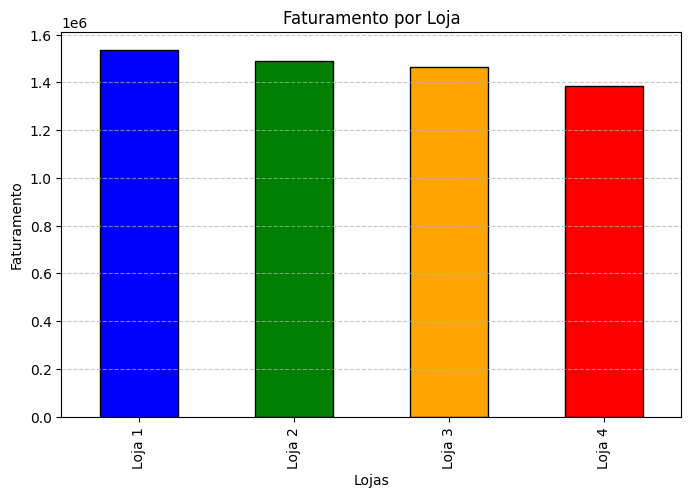

In [52]:
plt.figure(figsize=(8,5))
cores = ['blue','green','orange','red']
faturamento.plot(kind='bar', color=cores, edgecolor='black')
plt.xlabel('Lojas')
plt.ylabel('Faturamento')
plt.title('Faturamento por Loja')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('graficos/Faturamento_Loja.jpg', bbox_inches='tight')
plt.show()


A Loja 4 tem o menor faturamento no período todo da análise.
Vamos incluir na análise o ano da compra para cada loja, para verificar como se comporta a longo do tempo

In [13]:
# Converter campo para datetime
lojas['Data da Compra'] = pd.to_datetime(lojas['Data da Compra'],dayfirst=True)


In [14]:
# Agrupar por Loja e Ano da Compra
faturamento_ano = lojas.groupby([lojas['Data da Compra'].dt.year,'Loja'])['Preço'].sum()
faturamento_ano

Data da Compra  Loja  
2020            Loja 1    491911.51
                Loja 2    427288.25
                Loja 3    428943.09
                Loja 4    441129.52
2021            Loja 1    482829.91
                Loja 2    468288.89
                Loja 3    483938.91
                Loja 4    463763.27
2022            Loja 1    422086.24
                Loja 2    477635.56
                Loja 3    467250.70
                Loja 4    402961.23
2023            Loja 1    137681.46
                Loja 2    115246.36
                Loja 3     83892.33
                Loja 4     76643.56
Name: Preço, dtype: float64

Aparentemente o último ano (2023) não está com os dados de faturamentos até o final do ano, vamos verificar qual a última compra no dataset:


In [15]:
lojas['Data da Compra'].max()

Timestamp('2023-03-31 00:00:00')

Como o ano de 2023 só tem dados até o primeiro trimestre, achei mais relevante analisar o faturamento de cada loja por trimestre

In [16]:
# Realizando o agrupamento por Ano, Trimestre e Loja
faturamento_trimestre = lojas.groupby([lojas['Data da Compra'].dt.year, lojas['Data da Compra'].dt.quarter,'Loja'])['Preço'].sum()
faturamento_trimestre

Data da Compra  Data da Compra  Loja  
2020            1               Loja 1    139601.26
                                Loja 2    105378.42
                                Loja 3    108513.54
                                Loja 4     94283.75
                2               Loja 1    131394.38
                                Loja 2    105553.35
                                Loja 3    105240.95
                                Loja 4    131115.97
                3               Loja 1    128607.25
                                Loja 2    104198.25
                                Loja 3    114862.14
                                Loja 4    115109.13
                4               Loja 1     92308.62
                                Loja 2    112158.23
                                Loja 3    100326.46
                                Loja 4    100620.67
2021            1               Loja 1    116693.56
                                Loja 2    108139.10
                                Loja 3     94524.20
                                Loja 4    123312.88
                2               Loja 1    108333.25
                                Loja 2    111567.09
                                Loja 3    111251.75
                                Loja 4    103309.31
                3               Loja 1    155092.98
                                Loja 2    128755.27
                                Loja 3    100760.54
                                Loja 4    122929.83
                4               Loja 1    102710.12
                                Loja 2    119827.43
                                Loja 3    177402.42
                                Loja 4    114211.25
2022            1               Loja 1    105866.59
                                Loja 2    116855.89
                                Loja 3    119044.09
                                Loja 4    130521.42
                2               Loja 1     96621.91
                                Loja 2    124116.53
                                Loja 3    114250.89
                                Loja 4     85775.88
                3               Loja 1    122877.18
                                Loja 2    114148.97
                                Loja 3    117175.60
                                Loja 4     96876.99
                4               Loja 1     96720.56
                                Loja 2    122514.17
                                Loja 3    116780.12
                                Loja 4     89786.94
2023            1               Loja 1    137681.46
                                Loja 2    115246.36
                                Loja 3     83892.33
                                Loja 4     76643.56
Name: Preço, dtype: float64

In [17]:
# Transformando os dados para melhor visualização do gráfico por loja
fat_tm_loja = faturamento_trimestre.unstack(level='Loja')
fat_tm_loja

Loja                              Loja 1     Loja 2     Loja 3     Loja 4
Data da Compra Data da Compra                                            
2020           1               139601.26  105378.42  108513.54   94283.75
               2               131394.38  105553.35  105240.95  131115.97
               3               128607.25  104198.25  114862.14  115109.13
               4                92308.62  112158.23  100326.46  100620.67
2021           1               116693.56  108139.10   94524.20  123312.88
               2               108333.25  111567.09  111251.75  103309.31
               3               155092.98  128755.27  100760.54  122929.83
               4               102710.12  119827.43  177402.42  114211.25
2022           1               105866.59  116855.89  119044.09  130521.42
               2                96621.91  124116.53  114250.89   85775.88
               3               122877.18  114148.97  117175.60   96876.99
               4                96720.56  122514.17  116780.12   89786.94
2023           1               137681.46  115246.36   83892.33   76643.56

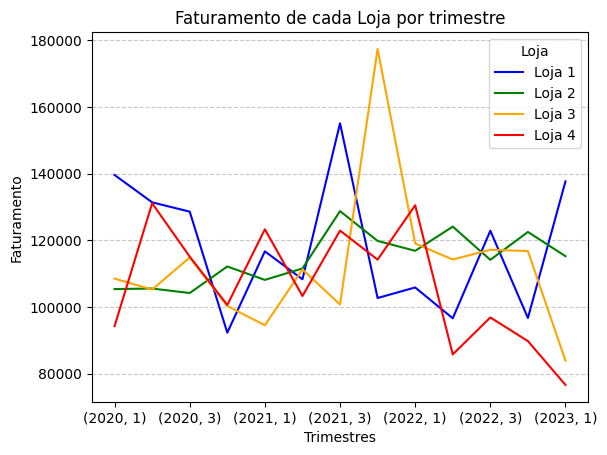

In [53]:
cores = ['blue','green','orange','red']
fat_tm_loja.plot(kind='line', color=cores)
plt.xlabel('Trimestres')
plt.ylabel('Faturamento')
plt.title('Faturamento de cada Loja por trimestre')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('graficos/Faturamento_Loja_trimestre.jpg', bbox_inches='tight')
plt.show()

## Análises adicionais de Faturamento:

In [57]:
# Agrupando por Local
vendas_loc = lojas.groupby('Local da compra')['Preço'].sum()
vendas_loc = vendas_loc.sort_values(ascending=False)

# Agrupando por Vendedor
vendas_vendedor = lojas.groupby('Vendedor')['Preço'].sum()
vendas_vendedor = vendas_vendedor.sort_values(ascending=False)

# Agrupando por Forma de Pagamento
vendas_pgto = lojas.groupby('Tipo de pagamento')['Preço'].sum()
vendas_pgto = vendas_pgto.sort_values(ascending=False)



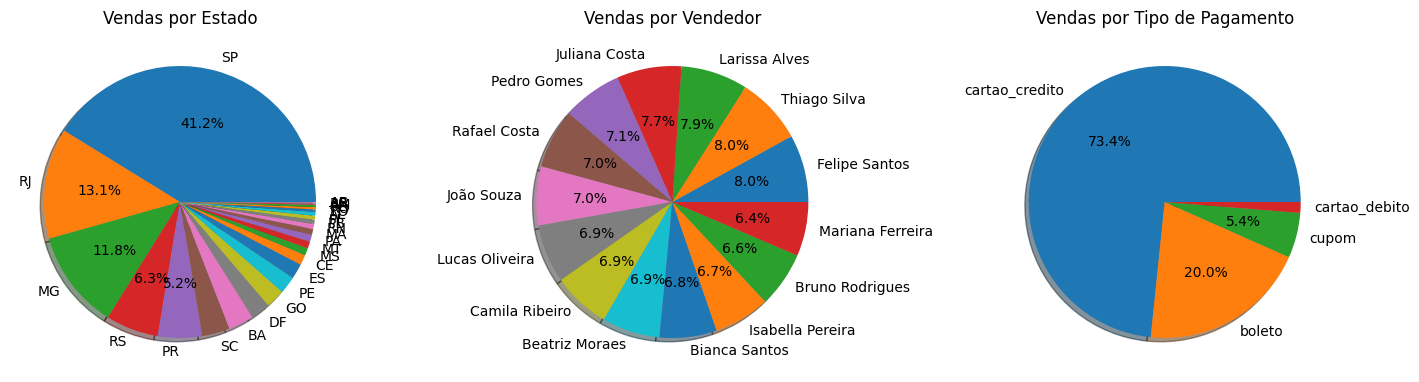

In [62]:
# Função para mostrar apenas percentuais maiores que 5%
def autopct_func(pct):
    return '%1.1f%%' % pct if pct > 5 else ''

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
vendas_loc.plot(kind='pie', ax=ax1, autopct=autopct_func, shadow=True)
ax1.set_title('Vendas por Estado')
ax1.set_ylabel('')

vendas_vendedor.plot(kind='pie', ax=ax2, autopct=autopct_func, shadow=True)
ax2.set_title('Vendas por Vendedor')
ax2.set_ylabel('')

vendas_pgto.plot(kind='pie', ax=ax3, autopct=autopct_func, shadow=True)
ax3.set_title('Vendas por Tipo de Pagamento')
ax3.set_ylabel('')


plt.subplots_adjust(bottom=0.2)
plt.savefig('graficos/Vendas_Loc_Vend_Pagto.jpg', bbox_inches='tight')
plt.show()

## Analise das vendas por coordenadas geográficas:

In [63]:
!pip install folium
import folium
from folium.plugins import HeatMap


In [65]:
coordenadas_com_peso = [[row['lat'], row['lon'], row['Preço']] for _, row in lojas.iterrows()]

# Criar um mapa centralizado no Brasil
# Centro aproximado do Brasil: latitude -14, longitude -51
mapa = folium.Map(location=[-14, -51], zoom_start=4)
HeatMap(coordenadas_com_peso, radius=15, blur=20).add_to(mapa)
mapa

# 2. Vendas por Categoria


In [19]:
# Agrupando por categoria e Faturamento
cat_fat = lojas.groupby('Categoria do Produto')['Preço'].sum()
cat_fat = cat_fat.sort_values(ascending=False)
cat_fat

,Preço
Categoria do Produto,
eletronicos,2214099.72
eletrodomesticos,1766337.03
moveis,1010214.00
instrumentos musicais,465029.67
esporte e lazer,190635.39
brinquedos,98140.86
utilidades domesticas,76773.38
livros,50260.74


In [20]:
# Agrupando por categoria e quantidade de vendas
cat_vendas = lojas.groupby('Categoria do Produto')['Preço'].count()
cat_vendas = cat_vendas.sort_values(ascending=False)
cat_vendas

,Preço
Categoria do Produto,
moveis,1886
eletronicos,1772
brinquedos,1290
eletrodomesticos,1149
esporte e lazer,1113
instrumentos musicais,753
livros,742
utilidades domesticas,730


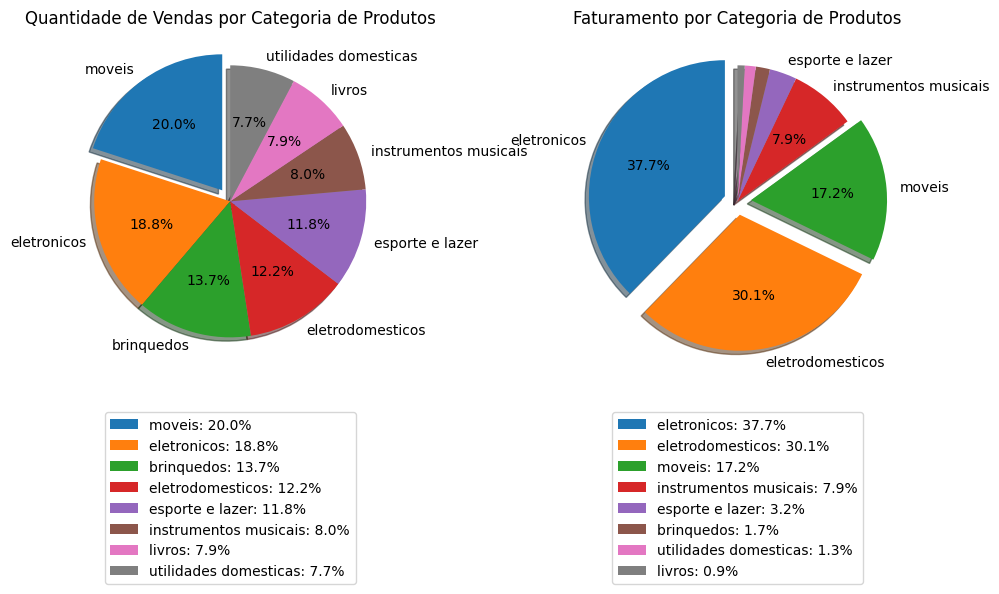

In [54]:
# Função para mostrar apenas percentuais maiores que 7%
def autopct_func(pct):
    return '%1.1f%%' % pct if pct > 7 else ''

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
num_categorias = len(cat_fat)
explode1 = (0.1,) + (0,) * (num_categorias - 1)
explode2 = (0.1,) + (0.1,) + (0.1,) + (0,) * (num_categorias - 3)


cat_vendas.plot(kind='pie', ax=ax1, autopct='%1.1f%%', explode=explode1, startangle=90, shadow=True)
ax1.legend(labels=[f'{cat}: {val/sum(cat_vendas)*100:.1f}%'
                   for cat, val in zip(cat_vendas.index, cat_vendas)],
                    loc='upper center', bbox_to_anchor=(0.5, -0.1))
ax1.set_title('Quantidade de Vendas por Categoria de Produtos')
ax1.set_ylabel('')

# Criar uma lista de rótulos onde categorias menores terão rótulo vazio
limite_percentual = 3
total = sum(cat_fat)
labels = [cat if (val/total*100) > limite_percentual else '' for cat, val in zip(cat_fat.index, cat_fat)]
cat_fat.plot(kind='pie', ax=ax2, autopct=autopct_func, explode=explode2, startangle=90, shadow=True, labels=labels)
ax2.legend(labels=[f'{cat}: {val/sum(cat_fat)*100:.1f}%'
                   for cat, val in zip(cat_fat.index, cat_fat)],
                    loc='upper center', bbox_to_anchor=(0.5, -0.1))
ax2.set_title('Faturamento por Categoria de Produtos')
ax2.set_ylabel('')
plt.subplots_adjust(bottom=0.2)
plt.savefig('graficos/Qtd_Fat_Categoria.jpg', bbox_inches='tight')
plt.show()

In [22]:
fat_acum = sum([cat_fat['eletronicos'],cat_fat['eletrodomesticos'],cat_fat['moveis']])
print(f'Faturamento acumulado: {fat_acum /sum(cat_fat)*100:.1f}%')

Faturamento acumulado: 85.0%


In [23]:
# Agrupando por Loja, categoria e Faturamento
cat_fat_loja = lojas.groupby(['Loja','Categoria do Produto'])['Preço'].sum()
cat_fat_loja = cat_fat_loja.sort_values(ascending=False).unstack(level='Loja')
cat_fat_loja

Loja,Loja 1,Loja 2,Loja 3,Loja 4
Categoria do Produto,,,,
brinquedos,23993.78,21262.21,25869.20,27015.67
eletrodomesticos,484913.36,464758.13,438984.89,377680.65
eletronicos,572659.23,547773.71,547699.92,545966.86
esporte e lazer,52387.55,46326.09,47456.10,44465.65
instrumentos musicais,121731.69,139987.03,103174.45,100136.50
livros,11713.92,13454.35,12664.70,12427.77
moveis,250178.11,235234.68,268095.56,256705.65
utilidades domesticas,16931.48,19662.86,20080.21,20098.83


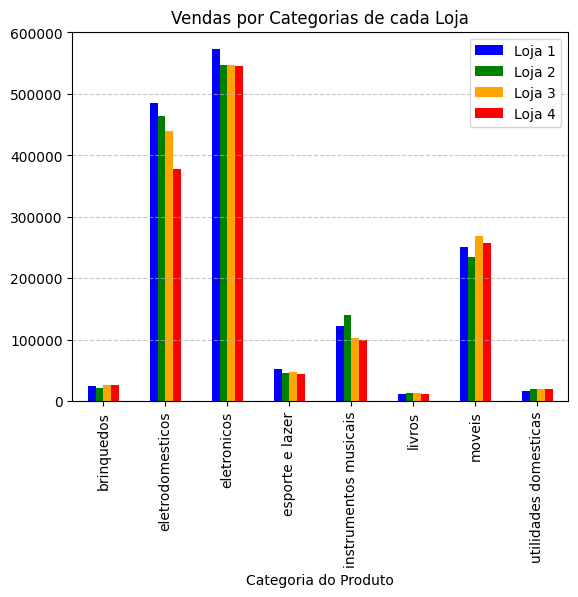

In [55]:
cores = ['blue','green','orange','red']
cat_fat_loja.plot(kind='bar', color=cores)
plt.title('Vendas por Categorias de cada Loja')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.savefig('graficos/Fat_Categoria_Loja.jpg', bbox_inches='tight')
plt.show()

# 3. Média de Avaliação das Lojas

In [25]:
# Agrupando por Loja e Avaliação
aval_loja = lojas[['Loja','Avaliação da compra']]

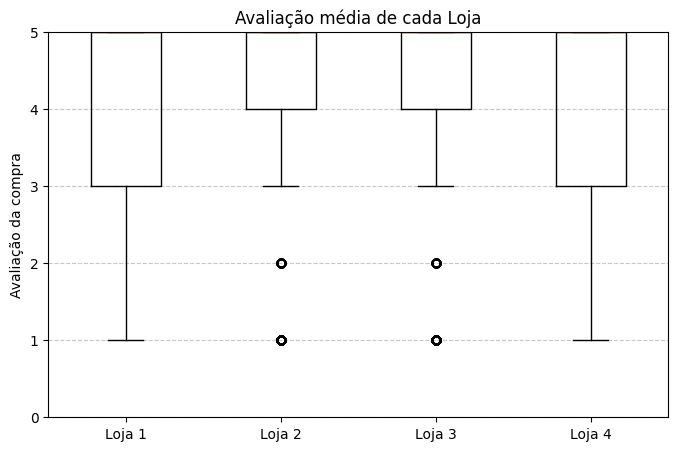

In [79]:
lojas_unicas = aval_loja['Loja'].unique()  # Obter as lojas únicas
dados_por_loja = [aval_loja[aval_loja['Loja'] == loja]['Avaliação da compra'].values for loja in lojas_unicas]
plt.figure(figsize=(8, 5))
plt.boxplot(dados_por_loja, tick_labels=lojas_unicas)
plt.ylabel('Avaliação da compra')
plt.ylim(0,5)
plt.title('Avaliação média de cada Loja')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('graficos/Box_Aval_Loja.jpg', bbox_inches='tight')
plt.show()

In [27]:
# Agrupando as avaliações de cada Loja por ano e mês
aval = lojas.groupby([lojas['Data da Compra'].dt.year, lojas['Data da Compra'].dt.month,'Loja'])['Avaliação da compra'].mean()
aval = aval.sort_values()
aval = aval.unstack(level='Loja')


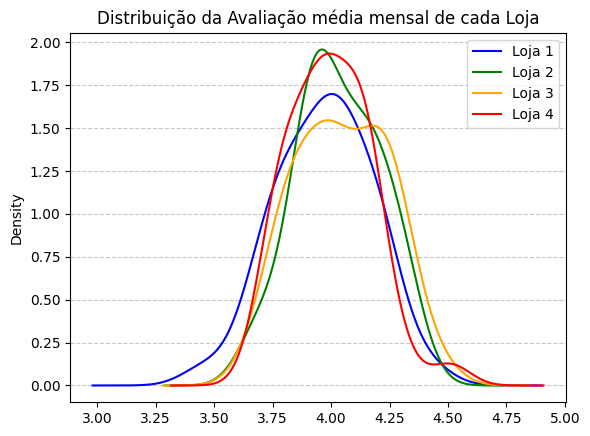

In [74]:
cores = ['blue','green','orange','red']
aval.plot(kind='density', color=cores)
plt.title('Distribuição da Avaliação média mensal de cada Loja')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.savefig('graficos/Dist_Aval_Loja.jpg', bbox_inches='tight')
plt.show()

In [29]:
aval_media = lojas.groupby('Loja')['Avaliação da compra'].mean()
aval_media.sort_values()

,Avaliação da compra
Loja,
Loja 1,3.976685
Loja 4,3.995759
Loja 2,4.037304
Loja 3,4.048326


In [30]:
aval_media.mean()

np.float64(4.014518414488967)

In [31]:
aval_loja_count = aval_loja.groupby(['Loja','Avaliação da compra'])['Avaliação da compra'].count()
aval_loja_count = aval_loja_count.unstack(level='Loja')
aval_loja_count.head(200)

Loja,Loja 1,Loja 2,Loja 3,Loja 4
Avaliação da compra,,,,
1,319,273,297,310
2,86,93,79,85
3,218,209,193,210
4,444,482,434,453
5,1292,1302,1356,1300


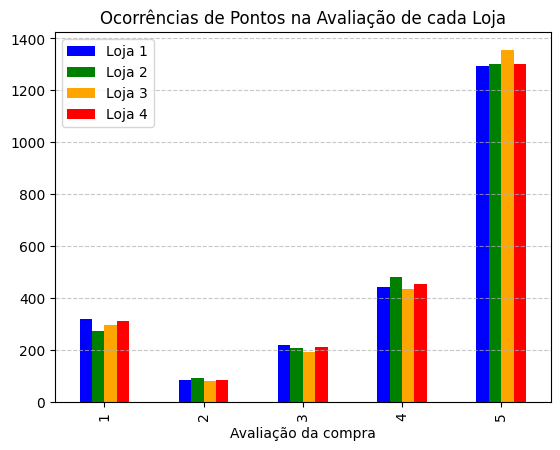

In [75]:
cores = ['blue','green','orange','red']
aval_loja_count.plot(kind='bar', color=cores)
plt.title('Ocorrências de Pontos na Avaliação de cada Loja')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper left')
plt.savefig('graficos/Aval_Loja.jpg', bbox_inches='tight')
plt.show()

# 4. Produtos Mais e Menos Vendidos

Produtos com menos vendas (157 vendas): Celular ABXY
Produtos com mais vendas (210 vendas): Cômoda


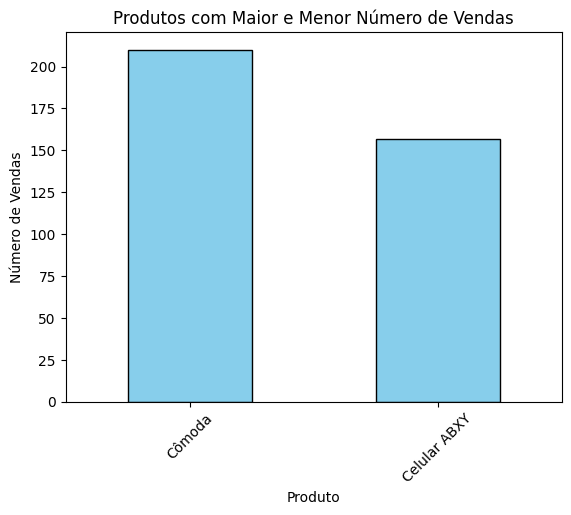

In [90]:
prod = lojas.groupby('Produto')['Produto'].count()
prod = prod.sort_values()

menor_valor = prod.min()
produto_menos_vendas = prod.index[0]
maior_valor = prod.max()
produto_mais_vendas = prod.index[-1]
print(f"Produtos com menos vendas ({menor_valor} vendas): {produto_menos_vendas}")
print(f"Produtos com mais vendas ({maior_valor} vendas): {produto_mais_vendas}")
extremos = prod.loc[[produto_mais_vendas, produto_menos_vendas]]
extremos.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Produtos com Maior e Menor Número de Vendas')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45)
plt.savefig('graficos/Produtos.jpg', bbox_inches='tight')
plt.show()

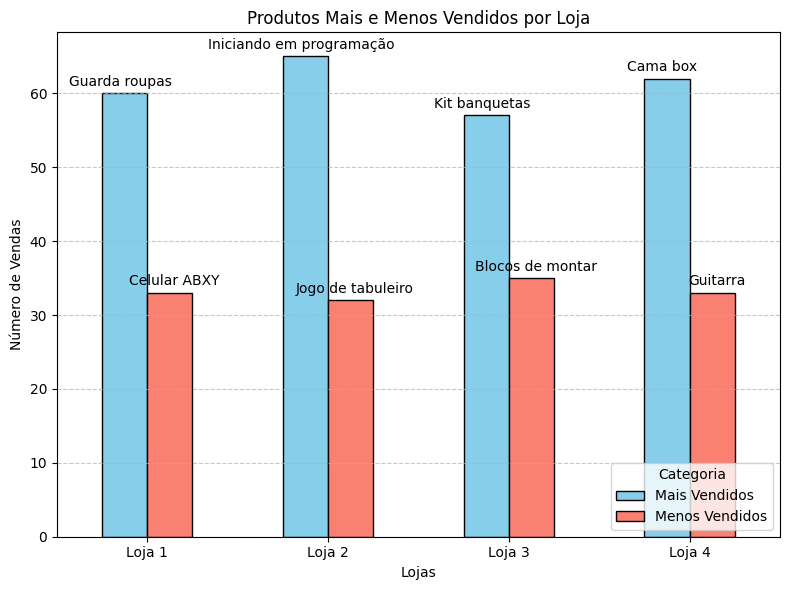

In [114]:
prod_loj = lojas.groupby(['Loja','Produto'])['Produto'].count().reset_index(name='Vendas')


mais_vendidos = prod_loj.loc[prod_loj.groupby('Loja')['Vendas'].idxmax()]
menos_vendidos = prod_loj.loc[prod_loj.groupby('Loja')['Vendas'].idxmin()]

grafico_data = pd.DataFrame({
    'Mais Vendidos': mais_vendidos.set_index('Loja')['Vendas'],
    'Menos Vendidos': menos_vendidos.set_index('Loja')['Vendas']
})
grafico_data.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'salmon'], edgecolor='black')
for i, loja in enumerate(grafico_data.index):
    plt.text(i - 0.15, grafico_data['Mais Vendidos'][loja] + 1, mais_vendidos[mais_vendidos['Loja'] == loja]['Produto'].values[0], rotation=0, ha='center')
    plt.text(i + 0.15, grafico_data['Menos Vendidos'][loja] + 1, menos_vendidos[menos_vendidos['Loja'] == loja]['Produto'].values[0], rotation=0, ha='center')

plt.title('Produtos Mais e Menos Vendidos por Loja')
plt.xlabel('Lojas')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=0)
plt.legend(title='Categoria', loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('graficos/Produtos_Loja.jpg', bbox_inches='tight')

# 5. Frete Médio por Loja


In [34]:
# Agrupando apenas por loja
frete_loja = lojas.groupby('Loja')['Frete'].mean()
frete_loja

,Frete
Loja,
Loja 1,34.691805
Loja 2,33.621941
Loja 3,33.074464
Loja 4,31.278997


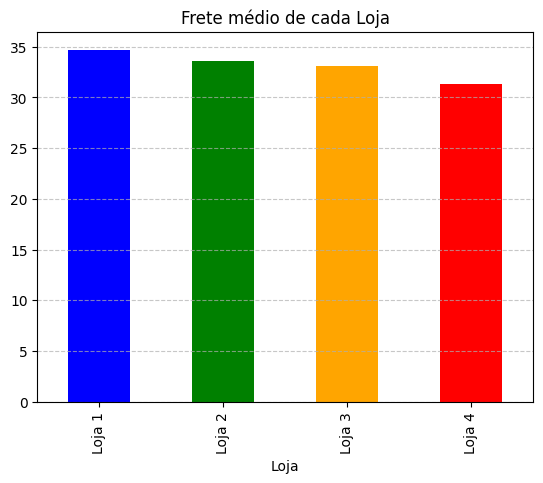

In [116]:
cores = ['blue','green','orange','red']
frete_loja.plot(kind='bar', color=cores)
plt.title('Frete médio de cada Loja')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('graficos/Frete_Loja.jpg', bbox_inches='tight')
plt.show()

In [36]:
# Agrupando por Ano e loja
frete = lojas.groupby([lojas['Data da Compra'].dt.year,'Loja'])['Frete'].mean()
frete = frete.sort_values()
frete = frete.unstack(level='Loja')
frete

Loja,Loja 1,Loja 2,Loja 3,Loja 4
Data da Compra,,,,
2020,36.822490,32.700568,32.463548,31.372439
2021,34.677159,32.706667,34.928842,33.328736
2022,31.533739,35.960806,33.744173,30.254287
2023,38.541206,31.974736,24.986982,25.769277


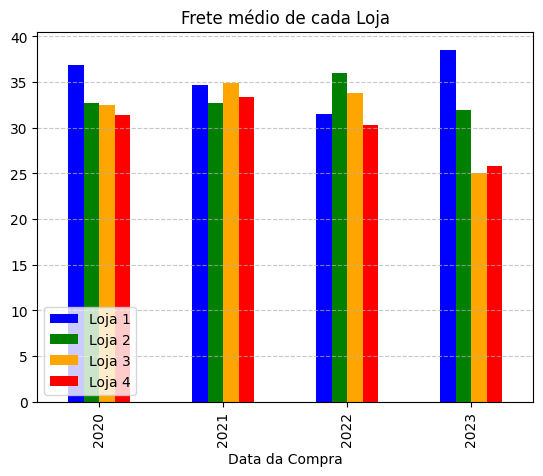

In [37]:
cores = ['blue','green','orange','red']
frete.plot(kind='bar', color=cores)
plt.title('Frete médio de cada Loja')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower left')
plt.show()

Observando os custos de frete consideravelmente menores na loja 4, resolvi investigar o faturamento descontado os fretes:

In [38]:
fat_frete = lojas.groupby('Loja')[['Preço','Frete']].sum()
fat_frete['Diferença'] = fat_frete['Preço'] - fat_frete['Frete']
fat_frete


,Preço,Frete,Diferença
Loja,,,
Loja 1,1534509.12,81837.967796,1.452671e+06
Loja 2,1488459.06,79314.158013,1.409145e+06
Loja 3,1464025.03,78022.661223,1.386002e+06
Loja 4,1384497.58,73755.875119,1.310742e+06


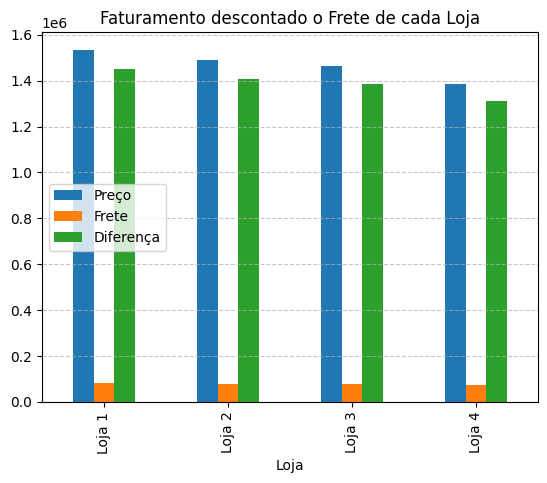

In [121]:
fat_frete.plot(kind='bar')
plt.title('Faturamento descontado o Frete de cada Loja')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='center left')
plt.savefig('graficos/Faturamento-Frete.jpg', bbox_inches='tight')
plt.show()

In [40]:
frete_perc = sum(lojas['Frete'])/sum(lojas['Preço'])*100

print(f'Percentual de Frete: {frete_perc:.1f}%')

Percentual de Frete: 5.3%


# ANÁLISE FINAL DO CENÁRIO AluraStoreBR

## Objetivo
O objetivo desse relatório é analisar os dados disponíveis das 4 lojas do Sr. João, para auxiliar na decisão sobre qual loja vender para levantar fundos para investir em um novo negócio.

## Metodologia
Os dados foram disponibilizados em 4 arquivos CSV, correspondentes à cada loja, com os seguintes campos:
- Produto
- Categoria do Produto
- Preço
- Frete
-	Data da Compra
- Vendedor
-	Local da compra
-	Avaliação da compra
-	Tipo de pagamento
-	Quantidade de parcelas
-	lat
-	lon

Para realizar a análise, foi utilizado o ambiente do Google Colab, com a linguagem Python e as bibliotecas Pandas, Matplotlib, entre outras.

Carreguei cada arquivo em um dataset separado e verifiquei a existência dos mesmos campos e tipos de dados. Como os dados estavam consistêntes, criei uma coluna adicional 'Loja' em cada dataset e uni os quatro em um único dataset chamado 'Lojas'.

# Análise do Faturamento por Loja:


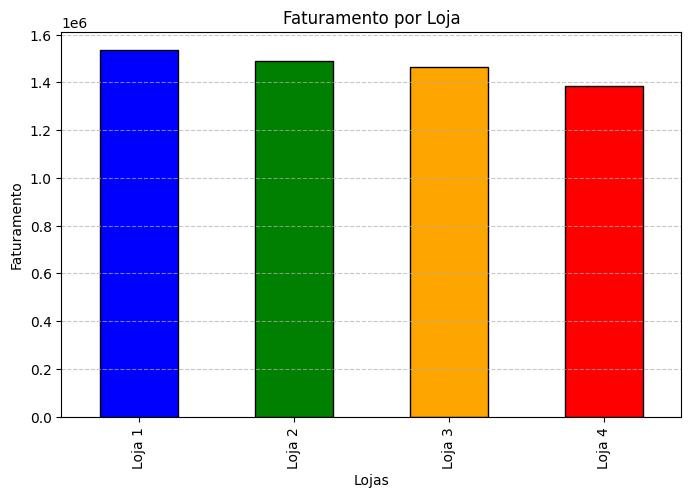

In [49]:
display(Image('graficos/Faturamento_Loja.jpg'))

Inicialmente criei um gráfico com o Faturamento total de cada loja, em que já notamos um faturamento menor na loja 4, mas para aprofundar a análise, verifiquei o faturamento anual, mas percebi que os dados do ano de 2023 estavam incompletos, só regsitrando as vendas até o primeiro trimestre de 2023, então resolvi criar um gráfico trimestral para tornar a análise mais relevante:


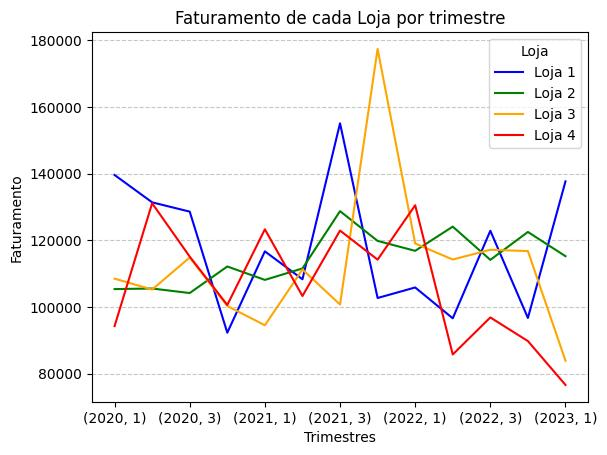

In [70]:
display(Image('graficos/Faturamento_Loja_trimestre.jpg'))

Podemos observar que nos ultimos 4 trimestres a Loja 4 vem mantendo um faturamento consideravelmente menor do que as demais, o que também é verificado no gráfico anterior com o faturamento total.
Apesar disso, essa loja obteve os maiores faturamentos nos primeiros trimestres de 2021 e 2022

# Análise por Categoria de Produtos

Verifiquei as categorias de produtos analisando a quantidade de vendas por categoria e também o Faturamento por categoria:


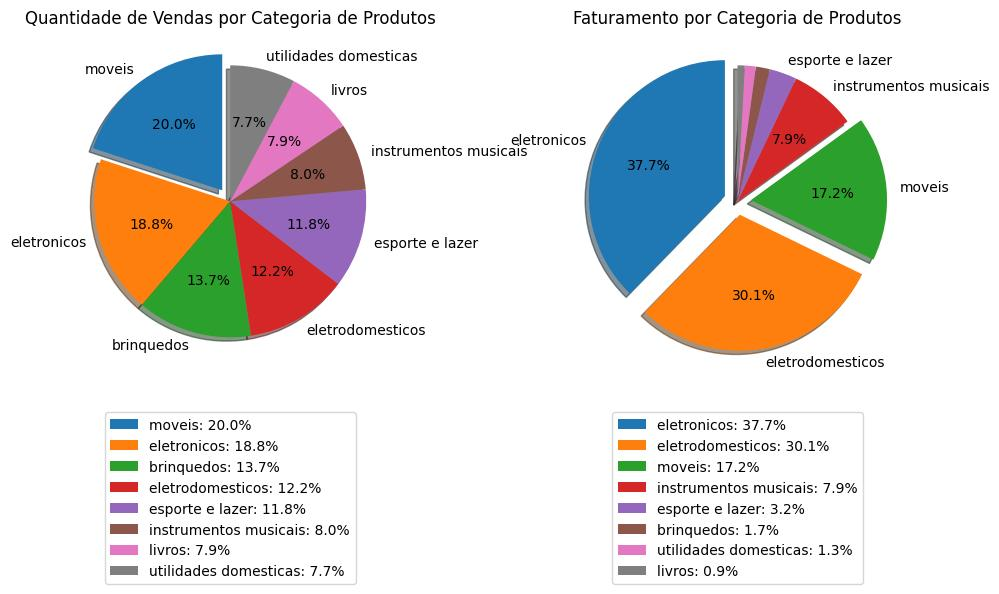

In [72]:
display(Image('graficos/Qtd_Fat_Categoria.jpg'))

Ao Observamos apenas a quantidade de vendas, a categoria ***móveis*** se destaca, seguida por ***eletrônicos***, ***brinquedos***, ***eletrodomésticos*** e ***esporte e lazer***, porém quando analisamos o faturamento por categoria, observamos que as categorias de ***eletrônicos*** e ***eletrodomésticos*** representam mais de 67% do faturamento total, e se somarmos os ***móveis*** teremos 85% do total


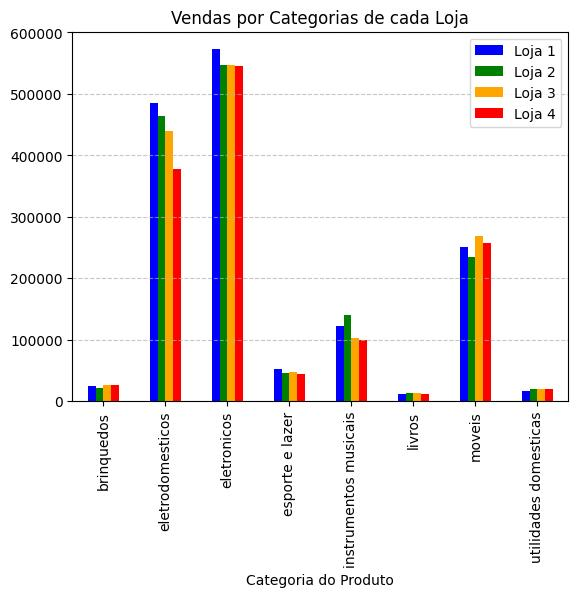

In [73]:
display(Image('graficos/Fat_Categoria_Loja.jpg'))


Ao analisarmos as categorias por loja, vemos que a loja 1 se destaca nas vendas das categorias principais ***eletrônicos*** e ***eletrodomésticos***.

#Análise da Avaliação dos clientes:

Observamos a seguinte média das avaliações de cada loja, ordenada da pior para a melhor:

* Loja 1 =  3.976685
* Loja 4 =	3.995759
* Loja 2 =	4.037304
* Loja 3 =	4.048326

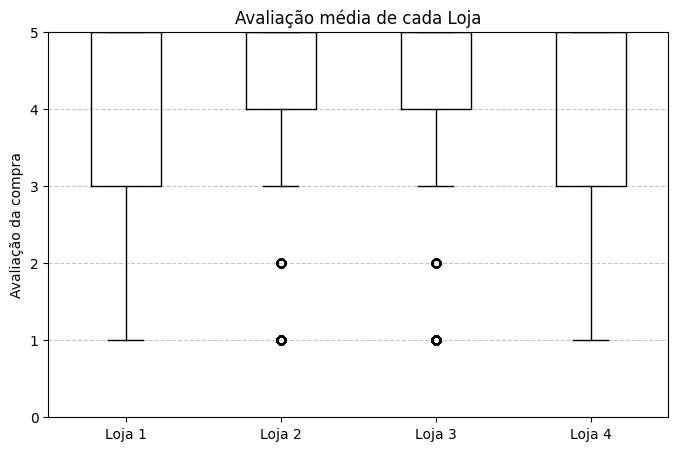

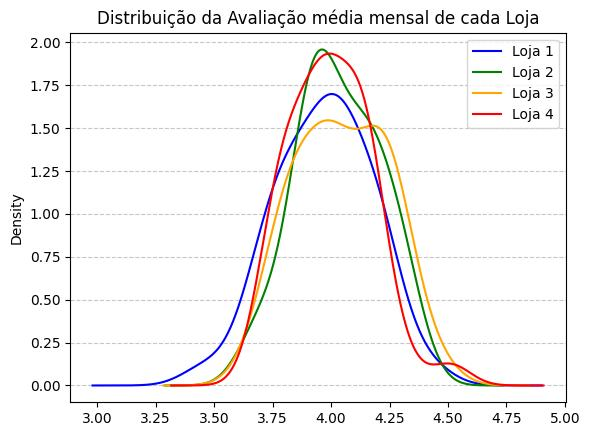

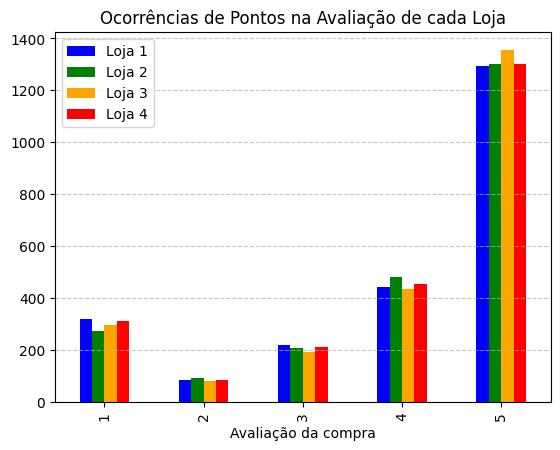

In [81]:
display(Image('graficos/Box_Aval_Loja.jpg'))
display(Image('graficos/Dist_Aval_Loja.jpg'))
display(Image('graficos/Aval_Loja.jpg'))

Observamos que a ***Loja 1*** tem uma pior avaliação média, seguida da ***Loja 4***, porém não observamos diferenças significativas entre as Lojas, o gráfico de distribuição e o *boxplot* mostram que ocorreram algumas avaliações com valores 1 e 2 nas lojas, por isso gerei um gráfico com a quantidade de avaliações por ponto de cada loja, mas também não foram encontradas diferenças adicionais significativas entre as lojas.

# Análise dos produtos mais e menos vendidos.

O produto com mais vendas foi:
* Cômoda

e o produto com menor número de vendas foi:
* Celular ABXY

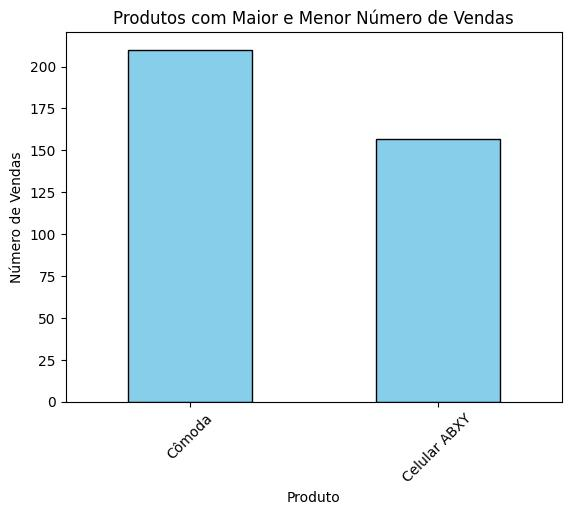

In [118]:
display(Image('graficos/Produtos.jpg'))

Analisei ainda os produtos mais e menos vendidos em cada loja:

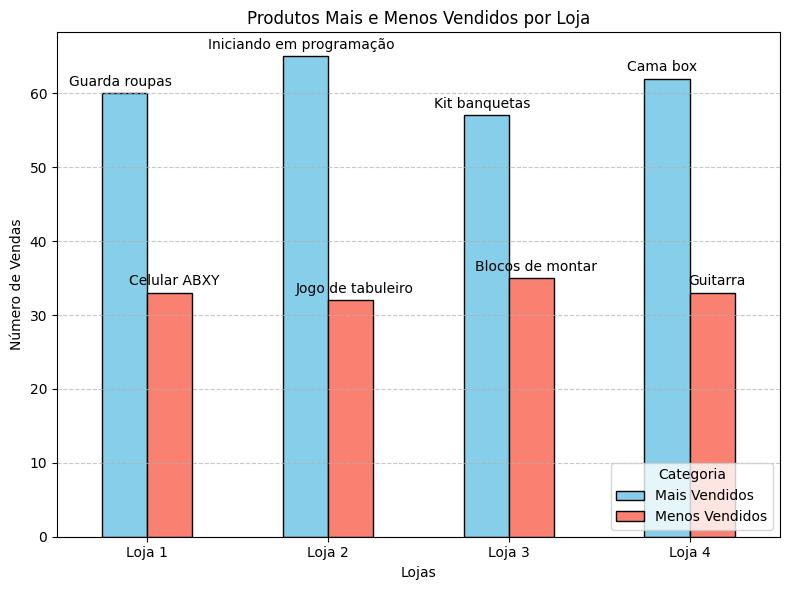

In [119]:
display(Image('graficos/Produtos_Loja.jpg'))

# Análise do Frete

Verifiquei o seguinte frete médio por loja:

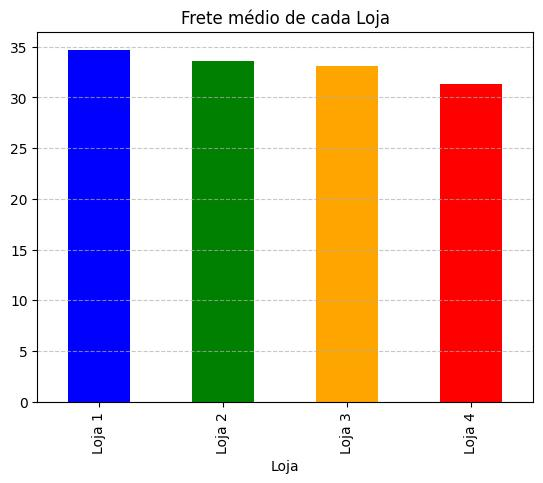

In [120]:
display(Image('graficos/Frete_Loja.jpg'))

Apesar do frete médio menor na Loja 4, se descontarmos o valor do frete do faturamento de cada loja, ainda assim a loja 4 tem o pior desempenho, como podemos ver no gráfico à seguir:

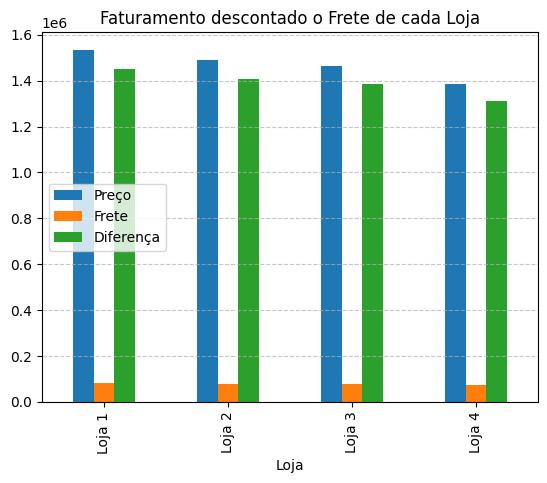

In [123]:
display(Image('graficos/Faturamento-Frete.jpg'))

# Analises adicionais:

Analisei ainda os percentuais de Vendas por Estado, por Vendedor e por Tipo de Pagamento, conforme o gráfico à seguir:

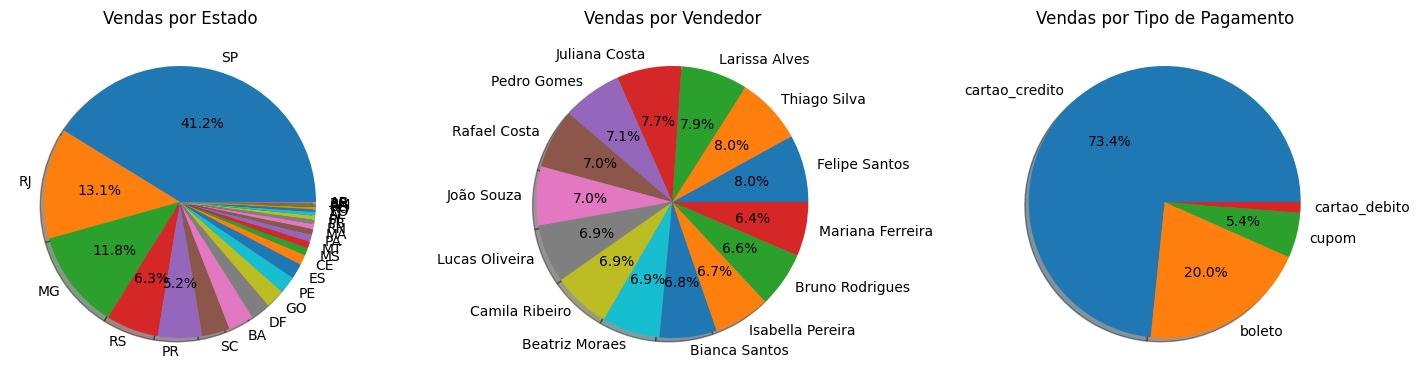

In [127]:
display(Image('graficos/Vendas_Loc_Vend_Pagto.jpg'))

Analisei ainda o volume de vendas por localidade, utilizando as informações de localização geográficas, apresentado no mapa abaixo:

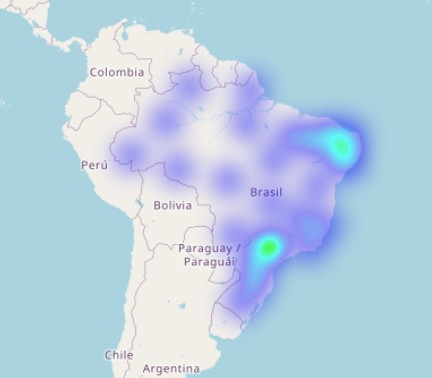

In [129]:
display(Image('graficos/Heat-Map.jpg'))

# Observações relevantes:

Notamos ainda que as seguintes categorias de produto representam 85% do faturamento, por isso recomendamos fortemente que seja dada uma prioridade no investimento de marketing e compras nessas categorias:
- Eletrônicos (38%)
- Eletrodomésticos (30%)
- Móveis (17%)

Especialmente as duas primeiras que representam 67% do faturamento total.

A Avaliação média dos consumidores é de 4.01 de 5 pontos possíveis

Os custos de Frete representam 5,3% do Faturamento


# CONCLUSÃO

Após analisarmos as vendas, a avaliação dos consumidores e os custos de frete de cada loja, observamos um desempenho inferior considerável em faturamento na Loja 4 em relação às demais, mesmo levando em conta o valor menor de frete.

Podemos ainda destacar que a Loja 4 apresenta uma queda considerável nas vendas nos últimos 4 trimestres.

Além disso essa loja é a segunda pior segundo a avaliação dos consumidores.

Nos dados disponíveis não obtivemos acessos aos custos e à margem de lucro de cada loja, portanto, levando em conta apenas os fatores presentes, a minha sugestão ao Sr. João é de que realize a venda da Loja 4 para capitalizar e investir em seu novo empreendimento.



